Step Machine Learning Modelling:
1. Import Library
2. Prepare Dataset
   - Data Cleansing (handle missing value, outlier, etc)
   - Feature Engineering (encoding, scaling, etc)
3. Model Declaration
4. Model Training
   - Model Optimization (parameter tuning, tweaking, etc) (todo)
5. Use Model
   - Evaluation
   - Inference
   - Save the model
   - Deployment

In [1]:
# import library
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [2]:
# Load data
df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Separate feature and label
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=46)

In [5]:
# Scaler declaration
scaler = StandardScaler()

# Scale training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale test data
X_test_scaled = scaler.transform(X_test)


In [6]:
# Model declaration
knn = KNeighborsClassifier(n_neighbors=3)

In [7]:
# Model training
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
# Predict test data
y_pred = knn.predict(X_test_scaled)

# Model evaluation
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        81
           1       0.57      0.60      0.58        35

    accuracy                           0.74       116
   macro avg       0.70      0.70      0.70       116
weighted avg       0.75      0.74      0.74       116



In [9]:
# Model saving
with open('model/model_knn.pkl', 'wb') as model_file:
    pickle.dump(knn, model_file)

### Choosing K

In [10]:
# Loop k and train each k
max_k = 30
training = []
testing = []
for k in range(max_k):
    # declaration
    knn_loop = KNeighborsClassifier(n_neighbors=k+1)

    # training
    knn_loop.fit(X_train_scaled, y_train)

    # training evaluation
    score_training = knn_loop.score(X_train_scaled, y_train)
    training.append(score_training)

    # test evaluation
    score_testing = knn_loop.score(X_test_scaled, y_test)
    testing.append(score_testing)

In [11]:
metrics = pd.DataFrame({'training': training, 'testing': testing})

<AxesSubplot:>

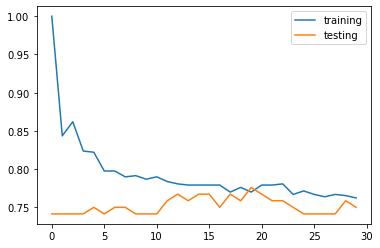

In [12]:
metrics.plot()

In [13]:
metrics[metrics['testing'] == metrics['testing'].max()]

,training,testing
19,0.769939,0.775862


# Naive Bayes

In [ ]:
# import library
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
